# Homework 

During the exercise you will be using the data from the 1987 National Indonesia Contraceptive Prevalence Survey. The detailed description of the dataset can be found at [UCI ML Repository website](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice). Read the raw data from the following URL: [https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data](https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data)

Your tasks are as follows:

- Identify the format of the raw data and read it into a dataframe correctly. Remember to provide a list of meaningful attribute names
- Normalize the `Age` attribute
- Remove the column containing the information about religion
- Create a second dataframe containig only women with highest degree of education
- Recode the `Wife working now` attribute, changing 0 to 'no' and 1 to 'yes'
- Compute the frequency of contraceptive methods grouping by the woman's education level
- Create a new column which will contain the average degree of education between a wife and a husband
- Create a new binary column which will indicate if a given woman has given birth to more than the average number of children
- Change `Standard of living` column into an ordered category
- Recode `Wife's education` attribute into a set of binary attributes using dummy variables
- Plot the histogram of the number of children
- Plot the bar chart of the standard of living

Save your notebook as *firstname.lastname.ipynb* and upload it to [the shared folder](https://drive.google.com/drive/folders/1WFtwffp2u8EdD9gtuN92VWeIRjz_MF8t?usp=sharing). The deadline for submitting your solutions is **Sunday, April 2, 21:00**. For this assignement you can get the maximum of **10 pts**.


In [5]:
import pandas as pd

col_names = ['wife_age', 'wife_education', 'husband_education', 'children_born', 'wife_religion', 'wife_working', 'husband_occupation', 'living_standard', 'media_exposure', 'method_used']

survey_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data', names=col_names)
survey_data

,wife_age,wife_education,husband_education,children_born,wife_religion,wife_working,husband_occupation,living_standard,media_exposure,method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [6]:
survey_data[['wife_age']] = survey_data[['wife_age']].apply(lambda x: round((x - x.min()) / (x.max() - x.min()), 4))
survey_data

,wife_age,wife_education,husband_education,children_born,wife_religion,wife_working,husband_occupation,living_standard,media_exposure,method_used
0,0.2424,2,3,3,1,1,2,3,0,1
1,0.8788,1,3,10,1,1,3,4,0,1
2,0.8182,2,3,7,1,1,3,4,0,1
3,0.7879,3,2,9,1,1,3,3,0,1
4,0.6061,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,0.5152,4,4,2,1,0,2,4,0,3
1469,0.5152,4,4,3,1,1,1,4,0,3
1470,0.6970,3,3,8,1,0,1,4,0,3
1471,0.5152,3,3,4,1,0,2,2,0,3


In [7]:
survey_data.drop('wife_religion', axis=1, inplace=True)
survey_data

,wife_age,wife_education,husband_education,children_born,wife_working,husband_occupation,living_standard,media_exposure,method_used
0,0.2424,2,3,3,1,2,3,0,1
1,0.8788,1,3,10,1,3,4,0,1
2,0.8182,2,3,7,1,3,4,0,1
3,0.7879,3,2,9,1,3,3,0,1
4,0.6061,3,3,8,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...
1468,0.5152,4,4,2,0,2,4,0,3
1469,0.5152,4,4,3,1,1,4,0,3
1470,0.6970,3,3,8,0,1,4,0,3
1471,0.5152,3,3,4,0,2,2,0,3


In [8]:
highest_education = survey_data['wife_education'] == survey_data['wife_education'].max()
women_highest_education = survey_data[highest_education]
women_highest_education 

,wife_age,wife_education,husband_education,children_born,wife_working,husband_occupation,living_standard,media_exposure,method_used
5,0.0909,4,4,0,1,3,3,0,1
12,0.8485,4,4,1,0,1,4,0,1
22,0.9091,4,4,1,1,1,4,0,1
23,0.6970,4,4,1,1,1,4,0,1
24,0.9697,4,4,5,1,1,4,0,1
...,...,...,...,...,...,...,...,...,...
1461,0.3333,4,4,4,1,1,2,1,3
1462,0.1515,4,4,1,1,2,4,0,3
1467,0.3939,4,4,3,1,1,4,0,3
1468,0.5152,4,4,2,0,2,4,0,3


In [9]:
survey_data['wife_working'] = survey_data['wife_working'].apply(lambda x: 'no' if x == 0 else 'yes')
survey_data

,wife_age,wife_education,husband_education,children_born,wife_working,husband_occupation,living_standard,media_exposure,method_used
0,0.2424,2,3,3,yes,2,3,0,1
1,0.8788,1,3,10,yes,3,4,0,1
2,0.8182,2,3,7,yes,3,4,0,1
3,0.7879,3,2,9,yes,3,3,0,1
4,0.6061,3,3,8,yes,3,2,0,1
...,...,...,...,...,...,...,...,...,...
1468,0.5152,4,4,2,no,2,4,0,3
1469,0.5152,4,4,3,yes,1,4,0,3
1470,0.6970,3,3,8,no,1,4,0,3
1471,0.5152,3,3,4,no,2,2,0,3


In [10]:
survey_data.groupby('wife_education').method_used.count()

wife_education
1    152
2    334
3    410
4    577
Name: method_used, dtype: int64

In [11]:
survey_data['avg_education_degree'] = (survey_data['wife_education'] + survey_data['husband_education']) / 2
survey_data

,wife_age,wife_education,husband_education,children_born,wife_working,husband_occupation,living_standard,media_exposure,method_used,avg_education_degree
0,0.2424,2,3,3,yes,2,3,0,1,2.5
1,0.8788,1,3,10,yes,3,4,0,1,2.0
2,0.8182,2,3,7,yes,3,4,0,1,2.5
3,0.7879,3,2,9,yes,3,3,0,1,2.5
4,0.6061,3,3,8,yes,3,2,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...
1468,0.5152,4,4,2,no,2,4,0,3,4.0
1469,0.5152,4,4,3,yes,1,4,0,3,4.0
1470,0.6970,3,3,8,no,1,4,0,3,3.0
1471,0.5152,3,3,4,no,2,2,0,3,3.0


In [12]:
avg_children_born = survey_data['children_born'].mean()
print('avg_children_born: ', avg_children_born)
survey_data['given_birth_more_than_avg'] = survey_data['children_born'].apply(lambda x: 1 if x > avg_children_born else 0)
survey_data

avg_children_born:  3.2613713509843856


,wife_age,wife_education,husband_education,children_born,wife_working,husband_occupation,living_standard,media_exposure,method_used,avg_education_degree,given_birth_more_than_avg
0,0.2424,2,3,3,yes,2,3,0,1,2.5,0
1,0.8788,1,3,10,yes,3,4,0,1,2.0,1
2,0.8182,2,3,7,yes,3,4,0,1,2.5,1
3,0.7879,3,2,9,yes,3,3,0,1,2.5,1
4,0.6061,3,3,8,yes,3,2,0,1,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1468,0.5152,4,4,2,no,2,4,0,3,4.0,0
1469,0.5152,4,4,3,yes,1,4,0,3,4.0,0
1470,0.6970,3,3,8,no,1,4,0,3,3.0,1
1471,0.5152,3,3,4,no,2,2,0,3,3.0,1


In [13]:
survey_data['living_standard'] = survey_data['living_standard'].astype('category')
survey_data['living_standard'] = survey_data['living_standard'].cat.as_ordered()
survey_data

,wife_age,wife_education,husband_education,children_born,wife_working,husband_occupation,living_standard,media_exposure,method_used,avg_education_degree,given_birth_more_than_avg
0,0.2424,2,3,3,yes,2,3,0,1,2.5,0
1,0.8788,1,3,10,yes,3,4,0,1,2.0,1
2,0.8182,2,3,7,yes,3,4,0,1,2.5,1
3,0.7879,3,2,9,yes,3,3,0,1,2.5,1
4,0.6061,3,3,8,yes,3,2,0,1,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1468,0.5152,4,4,2,no,2,4,0,3,4.0,0
1469,0.5152,4,4,3,yes,1,4,0,3,4.0,0
1470,0.6970,3,3,8,no,1,4,0,3,3.0,1
1471,0.5152,3,3,4,no,2,2,0,3,3.0,1


In [14]:
wife_education_dummies = pd.get_dummies(survey_data['wife_education'], prefix="wife_education")
survey_data = pd.concat([survey_data, wife_education_dummies], axis=1)
survey_data.drop('wife_education', axis=1, inplace=True)
# survey_data.drop(['wife_education', 'wife_education', 'wife_education', 'wife_education'], axis=1, inplace=True)
survey_data

,wife_age,husband_education,children_born,wife_working,husband_occupation,living_standard,media_exposure,method_used,avg_education_degree,given_birth_more_than_avg,wife_education_1,wife_education_2,wife_education_3,wife_education_4
0,0.2424,3,3,yes,2,3,0,1,2.5,0,0,1,0,0
1,0.8788,3,10,yes,3,4,0,1,2.0,1,1,0,0,0
2,0.8182,3,7,yes,3,4,0,1,2.5,1,0,1,0,0
3,0.7879,2,9,yes,3,3,0,1,2.5,1,0,0,1,0
4,0.6061,3,8,yes,3,2,0,1,3.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.5152,4,2,no,2,4,0,3,4.0,0,0,0,0,1
1469,0.5152,4,3,yes,1,4,0,3,4.0,0,0,0,0,1
1470,0.6970,3,8,no,1,4,0,3,3.0,1,0,0,1,0
1471,0.5152,3,4,no,2,2,0,3,3.0,1,0,0,1,0


<AxesSubplot: ylabel='Frequency'>

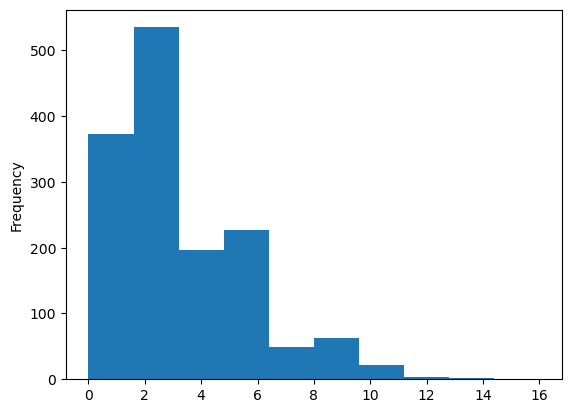

In [15]:
survey_data['children_born'].plot(kind='hist')

<AxesSubplot: >

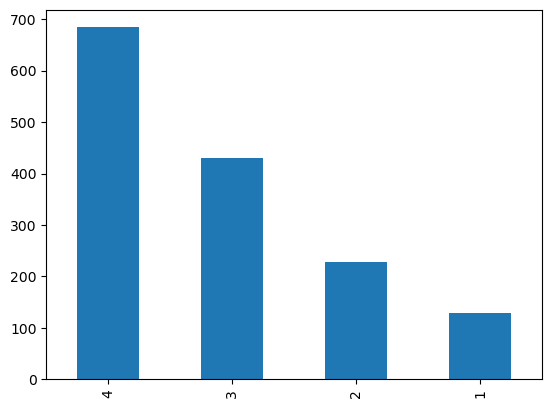

In [16]:
living_standard_counts = survey_data['living_standard'].value_counts()
living_standard_counts.plot(kind='bar')